# Stock Prices Prediction Using Keras Long Term Short Memory

In [ ]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
# Mounting the google colab drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the training set
data = pd.read_csv('/content/drive/MyDrive/SPX_5min.csv')
data

,DateTime,Open,High,Low,Close
0,30/4/2007 9:25,1494.07,1494.07,1494.07,1494.07
1,30/4/2007 9:30,1494.07,1495.36,1494.07,1495.09
2,30/4/2007 9:35,1495.13,1495.13,1493.48,1493.48
3,30/4/2007 9:40,1493.02,1493.27,1491.92,1492.53
4,30/4/2007 9:45,1492.53,1493.23,1492.19,1492.25
...,...,...,...,...,...
296640,4/2/2022 15:45,4521.53,4522.64,4511.64,4515.60
296641,4/2/2022 15:50,4515.60,4520.09,4508.55,4513.70
296642,4/2/2022 15:55,4513.54,4513.54,4499.81,4499.81
296643,4/2/2022 16:00,4499.98,4500.62,4499.98,4500.53


In [ ]:
from scipy.stats import linregress
def slope_reg(arr):
  y = np.array(arr)
  x = np.arange(len(y))
  slope, intercept, r_value, p_value, std_err = linregress(x,y)
  return slope

data["Date"] = pd.to_datetime(data['DateTime'],format="%d/%m/%Y %H:%M")
data['year'] = data["Date"].dt.year
data['month'] = data["Date"].dt.month
data['day'] = data["Date"].dt.day
data['hour'] = data["Date"].dt.hour
data['minute'] = data["Date"].dt.minute
data['sma10'] = data['Close'].rolling(10).mean()
data['sma20'] = data['Close'].rolling(20).mean()
data['sma50'] = data['Close'].rolling(50).mean()
data['sma120'] = data['Close'].rolling(120).mean()
data['SMA_30'] = data['Close'].rolling(window = 30).mean()
data['SMA_50'] = data['Close'].rolling(window = 50).mean()
data['SMA_150'] = data['Close'].rolling(window = 150).mean()
data['SMA_200'] = data['Close'].rolling(window = 200).mean()
data['SMA_slope_200'] = data['SMA_200'].rolling(window = 20).apply(slope_reg)
data['SMA_slope_30'] = data['SMA_30'].rolling(window = 20).apply(slope_reg)
data['Criterial1'] = (data['Close'] > data['SMA_150']) & (data['Close'] > data['SMA_200'])
data['Criterial2'] = (data['SMA_150'] > data['SMA_200'])
data['Criterial3'] = data['SMA_200']> 0.0
data['Criterial4'] = (data['SMA_50'] > data['SMA_150']) & (data['SMA_150'] > data['SMA_200'])
data['Criterial5'] = (data['Close'] > data['SMA_50'])
data['Criterial8'] = ((data['Close'] - data['Close'].shift(periods = 250))/ data['Close'].shift(periods = 250)) > 0.89
#data['Criterial9'] = (data['Volume'] / data['Close']).rolling(window=50).mean() > 50000
data['Criterial10'] = data['Close'] >((data['Close']).rolling(window = 5).mean()+(data['Close']).rolling(window = 5).mean())/3
data['Criterial11'] = (data['Close'].rolling(window = 10).max() - data['Close'].rolling(window = 10).min()) < 0.1
data['Criterial12'] = data['SMA_slope_30'] > 0
data['Criterial13'] = ((data['Close'] - data['Open']) > 0)
data['Criterial14'] = (data['Close']-data['Open'])/(data['High']-data['Low']) > 0.7

data

,DateTime,Open,High,Low,Close,Date,year,month,day,hour,...,Criterial2,Criterial3,Criterial4,Criterial5,Criterial8,Criterial10,Criterial11,Criterial12,Criterial13,Criterial14
0,2007-04-30 09:25:00,1494.07,1494.07,1494.07,1494.07,2007-04-30 09:25:00,2007,4,30,9,...,False,False,False,False,False,False,False,False,False,False
1,2007-04-30 09:30:00,1494.07,1495.36,1494.07,1495.09,2007-04-30 09:30:00,2007,4,30,9,...,False,False,False,False,False,False,False,False,True,True
2,2007-04-30 09:35:00,1495.13,1495.13,1493.48,1493.48,2007-04-30 09:35:00,2007,4,30,9,...,False,False,False,False,False,False,False,False,False,False
3,2007-04-30 09:40:00,1493.02,1493.27,1491.92,1492.53,2007-04-30 09:40:00,2007,4,30,9,...,False,False,False,False,False,False,False,False,False,False
4,2007-04-30 09:45:00,1492.53,1493.23,1492.19,1492.25,2007-04-30 09:45:00,2007,4,30,9,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296640,2022-02-04 15:45:00,4521.53,4522.64,4511.64,4515.60,2022-02-04 15:45:00,2022,2,4,15,...,False,True,False,True,False,True,False,True,False,False
296641,2022-02-04 15:50:00,4515.60,4520.09,4508.55,4513.70,2022-02-04 15:50:00,2022,2,4,15,...,False,True,False,True,False,True,False,True,False,False
296642,2022-02-04 15:55:00,4513.54,4513.54,4499.81,4499.81,2022-02-04 15:55:00,2022,2,4,15,...,False,True,False,False,False,True,False,True,False,False
296643,2022-02-04 16:00:00,4499.98,4500.62,4499.98,4500.53,2022-02-04 16:00:00,2022,2,4,16,...,False,True,False,False,False,True,False,True,True,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296645 entries, 0 to 296644
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DateTime       296645 non-null  datetime64[ns]
 1   Open           296645 non-null  float64       
 2   High           296645 non-null  float64       
 3   Low            296645 non-null  float64       
 4   Close          296645 non-null  float64       
 5   Date           296645 non-null  datetime64[ns]
 6   year           296645 non-null  int64         
 7   month          296645 non-null  int64         
 8   day            296645 non-null  int64         
 9   hour           296645 non-null  int64         
 10  minute         296645 non-null  int64         
 11  sma10          296636 non-null  float64       
 12  sma20          296626 non-null  float64       
 13  sma50          296596 non-null  float64       
 14  sma120         296526 non-null  float64       
 15  

In [ ]:
data = data.iloc[219:,:]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296426 entries, 219 to 296644
Data columns (total 32 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   DateTime       296426 non-null  datetime64[ns]
 1   Open           296426 non-null  float64       
 2   High           296426 non-null  float64       
 3   Low            296426 non-null  float64       
 4   Close          296426 non-null  float64       
 5   Date           296426 non-null  datetime64[ns]
 6   year           296426 non-null  int64         
 7   month          296426 non-null  int64         
 8   day            296426 non-null  int64         
 9   hour           296426 non-null  int64         
 10  minute         296426 non-null  int64         
 11  sma10          296426 non-null  float64       
 12  sma20          296426 non-null  float64       
 13  sma50          296426 non-null  float64       
 14  sma120         296426 non-null  float64       
 15

In [ ]:
data.to_csv('/content/drive/MyDrive/Data Analysis/Python study/expand_aapl_from 1-1-2017 to 6-24-2022_5.csv')

NameError: ignored

In [ ]:
data['price after 30mins'] = data['Close'].shift(periods = -6)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data = data.iloc[:106454,:]
data

,DateTime,Open,High,Low,Close,Date,year,month,day,hour,...,Criterial3,Criterial4,Criterial5,Criterial8,Criterial10,Criterial11,Criterial12,Criterial13,Criterial14,price after 30mins
219,2007-05-02 14:10:00,1497.74,1497.94,1497.67,1497.92,2007-05-02 14:10:00,2007,5,2,14,...,True,False,True,False,True,False,True,True,False,1498.57
220,2007-05-02 14:15:00,1497.90,1498.51,1497.88,1498.51,2007-05-02 14:15:00,2007,5,2,14,...,True,False,True,False,True,False,True,True,True,1498.30
221,2007-05-02 14:20:00,1498.85,1499.10,1498.72,1498.81,2007-05-02 14:20:00,2007,5,2,14,...,True,False,True,False,True,False,True,False,False,1497.93
222,2007-05-02 14:25:00,1498.83,1499.09,1498.62,1498.97,2007-05-02 14:25:00,2007,5,2,14,...,True,False,True,False,True,False,True,True,False,1497.76
223,2007-05-02 14:30:00,1498.99,1499.00,1498.56,1498.66,2007-05-02 14:30:00,2007,5,2,14,...,True,False,True,False,True,False,True,False,False,1497.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106668,2012-08-15 09:55:00,1406.02,1406.57,1405.67,1405.67,2012-08-15 09:55:00,2012,8,15,9,...,True,True,True,False,True,False,False,False,False,1405.33
106669,2012-08-15 10:00:00,1405.77,1406.63,1405.77,1406.63,2012-08-15 10:00:00,2012,8,15,10,...,True,True,True,False,True,False,False,True,True,1406.01
106670,2012-08-15 10:05:00,1406.66,1406.66,1405.74,1406.30,2012-08-15 10:05:00,2012,8,15,10,...,True,True,True,False,True,False,False,False,False,1404.83
106671,2012-08-15 10:10:00,1406.29,1406.64,1405.27,1405.44,2012-08-15 10:10:00,2012,8,15,10,...,True,True,False,False,True,False,False,False,False,1403.71


In [ ]:
data.drop(columns="Unnamed: 0",inplace=True)

KeyError: ignored

In [ ]:
data

,DateTime,Open,High,Low,Close,Date,year,month,day,hour,...,Criterial3,Criterial4,Criterial5,Criterial8,Criterial10,Criterial11,Criterial12,Criterial13,Criterial14,price after 30mins
219,2007-05-02 14:10:00,1497.74,1497.94,1497.67,1497.92,2007-05-02 14:10:00,2007,5,2,14,...,True,False,True,False,True,False,True,True,False,1498.57
220,2007-05-02 14:15:00,1497.90,1498.51,1497.88,1498.51,2007-05-02 14:15:00,2007,5,2,14,...,True,False,True,False,True,False,True,True,True,1498.30
221,2007-05-02 14:20:00,1498.85,1499.10,1498.72,1498.81,2007-05-02 14:20:00,2007,5,2,14,...,True,False,True,False,True,False,True,False,False,1497.93
222,2007-05-02 14:25:00,1498.83,1499.09,1498.62,1498.97,2007-05-02 14:25:00,2007,5,2,14,...,True,False,True,False,True,False,True,True,False,1497.76
223,2007-05-02 14:30:00,1498.99,1499.00,1498.56,1498.66,2007-05-02 14:30:00,2007,5,2,14,...,True,False,True,False,True,False,True,False,False,1497.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106668,2012-08-15 09:55:00,1406.02,1406.57,1405.67,1405.67,2012-08-15 09:55:00,2012,8,15,9,...,True,True,True,False,True,False,False,False,False,1405.33
106669,2012-08-15 10:00:00,1405.77,1406.63,1405.77,1406.63,2012-08-15 10:00:00,2012,8,15,10,...,True,True,True,False,True,False,False,True,True,1406.01
106670,2012-08-15 10:05:00,1406.66,1406.66,1405.74,1406.30,2012-08-15 10:05:00,2012,8,15,10,...,True,True,True,False,True,False,False,False,False,1404.83
106671,2012-08-15 10:10:00,1406.29,1406.64,1405.27,1405.44,2012-08-15 10:10:00,2012,8,15,10,...,True,True,False,False,True,False,False,False,False,1403.71


In [ ]:
no_train_records = 78235

df_date = data[["DateTime"]]
data = data.drop('Date',axis = 1)
df_train = data.iloc[:no_train_records,1:31]
y_tr = data.iloc[:no_train_records,31:]
df_test = data.iloc[no_train_records:,1:31]
df_test.reset_index(inplace=True) # reset_index is to make sure the df_test data frame start from row 0, instead of row 78235
y_te = data.iloc[no_train_records:,31:]



In [ ]:
from sklearn.preprocessing import StandardScaler

sc1, sc2 = StandardScaler(), StandardScaler()

df_train_scaled = sc1.fit_transform(df_train)
print(df_train_scaled.shape)

df_train_scaled_y = sc2.fit_transform(y_tr[['price after 30mins']])
print(df_train_scaled_y.shape)

(78235, 30)
(78235, 1)


In [ ]:
steps = 14

X_train = []
y_train = []

for i in range(steps,no_train_records):
  X_train.append(df_train_scaled[i-steps:i])
  y_train.append(df_train_scaled_y[i][0])

X_train, y_train = np.array(X_train), np.array(y_train)
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (78221, 14, 30)
y_train (78221,)


In [ ]:
X_train_shape = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_train_shape.shape

(78221, 14, 30)

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
# Initialising the RNN
regressor = Sequential()
# units : 50, 100, 200, 256, 512, 1024
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train_shape.shape[1], 30)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'Adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train_shape, y_train, epochs = 50, batch_size = 64)

Epoch 1/50
1223/1223 [==============================] - 28s 12ms/step - loss: 0.0199
Epoch 2/50
1223/1223 [==============================] - 14s 12ms/step - loss: 0.0088
Epoch 3/50
1223/1223 [==============================] - 15s 12ms/step - loss: 0.0082
Epoch 4/50
1223/1223 [==============================] - 14s 12ms/step - loss: 0.0077
Epoch 5/50
1223/1223 [==============================] - 14s 12ms/step - loss: 0.0076
Epoch 6/50
1223/1223 [==============================] - 14s 12ms/step - loss: 0.0074
Epoch 7/50
1223/1223 [==============================] - 15s 12ms/step - loss: 0.0072
Epoch 8/50
1223/1223 [==============================] - 15s 12ms/step - loss: 0.0072
Epoch 9/50
1223/1223 [==============================] - 15s 12ms/step - loss: 0.0071
Epoch 10/50
1223/1223 [==============================] - 15s 12ms/step - loss: 0.0070
Epoch 11/50
1223/1223 [==============================] - 14s 12ms/step - loss: 0.0070
Epoch 12/50
1223/1223 [==============================] - 14s 12

In [ ]:
df_train_last14 = df_train.iloc[-14:]

full_df = pd.concat((df_train_last14,df_test),axis=0)

print(full_df.shape)
print(full_df.head())

(28233, 31)
          Open     High      Low    Close  year  month  day  hour  minute  \
78440  1297.10  1297.27  1296.61  1297.27  2011      3   21    15      40   
78441  1297.40  1297.93  1297.37  1297.77  2011      3   21    15      45   
78442  1297.76  1298.58  1297.20  1298.41  2011      3   21    15      50   
78443  1298.42  1298.51  1297.50  1298.11  2011      3   21    15      55   
78444  1298.27  1298.38  1298.27  1298.38  2011      3   21    16       0   

          sma10  ...  Criterial3  Criterial4  Criterial5  Criterial8  \
78440  1297.031  ...        True        True       False       False   
78441  1297.064  ...        True        True       False       False   
78442  1297.158  ...        True        True        True       False   
78443  1297.133  ...        True        True        True       False   
78444  1297.246  ...        True        True        True       False   

       Criterial10  Criterial11  Criterial12  Criterial13  Criterial14  index  
78440       

In [ ]:
full_df.drop(columns = ['index'], inplace=True)
full_df.head()

,Open,High,Low,Close,year,month,day,hour,minute,sma10,...,Criterial2,Criterial3,Criterial4,Criterial5,Criterial8,Criterial10,Criterial11,Criterial12,Criterial13,Criterial14
78440,1297.10,1297.27,1296.61,1297.27,2011,3,21,15,40,1297.031,...,True,True,True,False,False,True,False,False,True,False
78441,1297.40,1297.93,1297.37,1297.77,2011,3,21,15,45,1297.064,...,True,True,True,False,False,True,False,False,True,False
78442,1297.76,1298.58,1297.20,1298.41,2011,3,21,15,50,1297.158,...,True,True,True,True,False,True,False,False,True,False
78443,1298.42,1298.51,1297.50,1298.11,2011,3,21,15,55,1297.133,...,True,True,True,True,False,True,False,False,False,False
78444,1298.27,1298.38,1298.27,1298.38,2011,3,21,16,0,1297.246,...,True,True,True,True,False,True,False,False,True,True


In [ ]:
full_df = sc1.transform(full_df)
full_df.shape

(28233, 30)

In [ ]:
X_train_shape_pred = []

for i in range(steps,full_df.shape[0]):
  X_train_shape_pred.append(full_df[i-steps:i])
  
X_train_shape_pred = np.array(X_train_shape_pred)

print("X_train_shape_pred", X_train_shape_pred.shape)


X_train_shape_pred (28219, 14, 30)


In [ ]:
ytest = regressor.predict(X_train_shape_pred)

y_final_pred = sc2.inverse_transform(ytest)
y_final_pred

array([[1291.9333],
       [1292.1647],
       [1292.245 ],
       ...,
       [1412.1844],
       [1411.7874],
       [1411.2542]], dtype=float32)

In [ ]:
final_pred = pd.DataFrame(y_final_pred)
final_pred.columns = ["final_pred"]
final_pred

,final_pred
0,1291.933350
1,1292.164673
2,1292.244995
3,1293.670410
4,1293.030884
...,...
28214,1408.641235
28215,1410.400391
28216,1412.184448
28217,1411.787354


In [ ]:
full_final = pd.concat((final_pred,df_test),axis=1)

full_final

,final_pred,index,Open,High,Low,Close,year,month,day,hour,...,Criterial2,Criterial3,Criterial4,Criterial5,Criterial8,Criterial10,Criterial11,Criterial12,Criterial13,Criterial14
0,1291.933350,78454,1296.41,1296.65,1295.26,1296.65,2011,3,22,10,...,True,True,True,False,False,True,False,False,True,False
1,1292.164673,78455,1296.64,1297.14,1296.42,1297.05,2011,3,22,10,...,True,True,True,False,False,True,False,False,True,False
2,1292.244995,78456,1297.50,1298.83,1297.25,1298.83,2011,3,22,10,...,True,True,True,True,False,True,False,False,True,True
3,1293.670410,78457,1298.67,1298.67,1297.31,1297.65,2011,3,22,10,...,True,True,True,False,False,True,False,False,False,False
4,1293.030884,78458,1297.67,1297.74,1297.13,1297.33,2011,3,22,10,...,True,True,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28214,1408.641235,106668,1406.02,1406.57,1405.67,1405.67,2012,8,15,9,...,True,True,True,True,False,True,False,False,False,False
28215,1410.400391,106669,1405.77,1406.63,1405.77,1406.63,2012,8,15,10,...,True,True,True,True,False,True,False,False,True,True
28216,1412.184448,106670,1406.66,1406.66,1405.74,1406.30,2012,8,15,10,...,True,True,True,True,False,True,False,False,False,False
28217,1411.787354,106671,1406.29,1406.64,1405.27,1405.44,2012,8,15,10,...,True,True,True,False,False,True,False,False,False,False


In [ ]:
full_final['price after 30mins'] = full_final['Close'].shift(periods = -6)
full_final['diff'] = full_final['final_pred'] - full_final['price after 30mins']

In [ ]:
full_final.to_csv('/content/drive/MyDrive/Data Analysis/Python study/aapl test.csv')

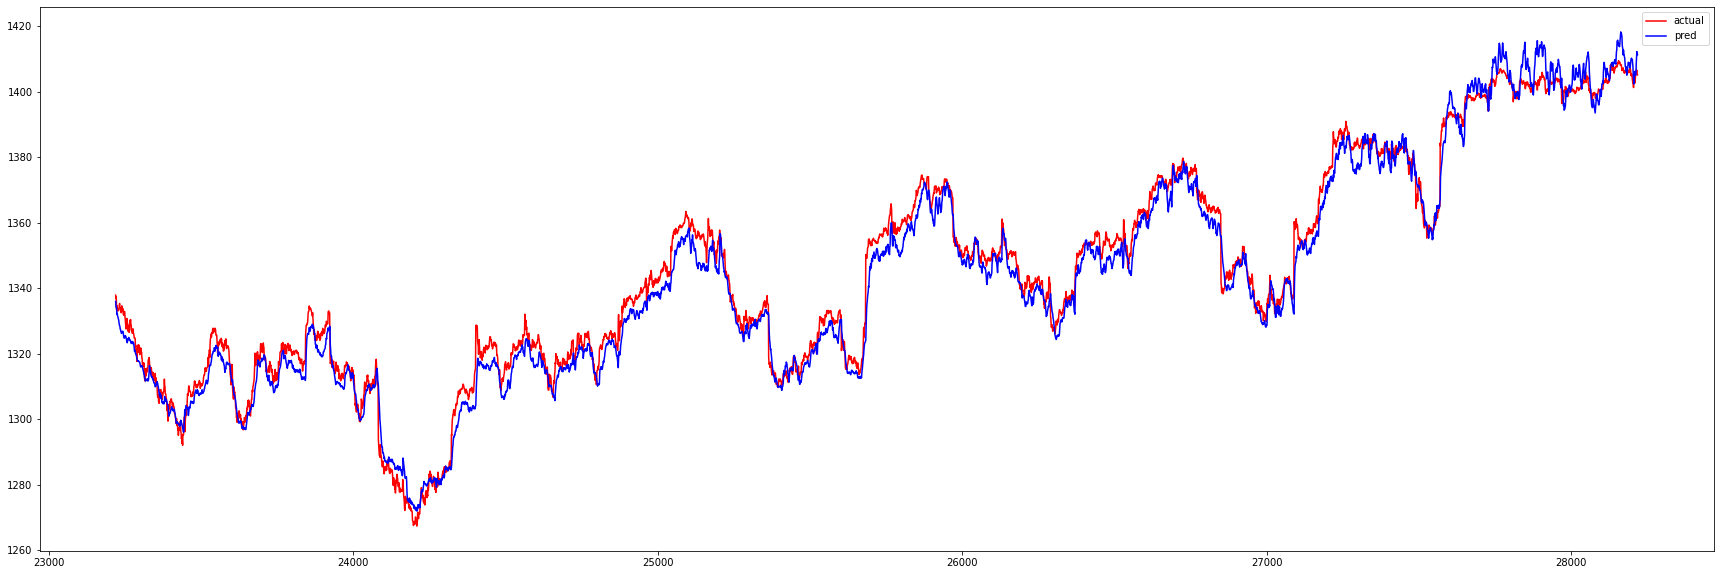

In [ ]:
plt.figure(figsize=(30,10))

plt.plot(full_final["Close"][-5000:],label="actual", color="red")
plt.plot(full_final["final_pred"][-5000:],label="pred", color="blue")
#plt.plot(full_final["diff"][-1000:],label="diff", color="green")

plt.legend()

In [ ]:
regressor.save('/content/drive/MyDrive/Data Analysis/Python study/seq model (for close price)_expand_aapl_from 1-1-2017 to 6-24-2022_5.h5')

In [ ]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 14, 50)            16200     
                                                                 
 dropout_5 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 14, 50)           

In [ ]:
from tensorflow import keras
model_test = keras.models.load_model('/content/drive/MyDrive/Data Analysis/Python study/seq model (for close price)_expand_aapl_from 1-1-2017 to 6-24-2022_5.h5')

model_test.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 14, 50)            16800     
                                                                 
 dropout (Dropout)           (None, 14, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 14, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 14, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 14, 50)           